In [72]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr
import pdal


from forest_structure_tools.metrics import forest_structure_metrics

In [73]:
data_dir = Path("../data")
plots_dir = data_dir / "outputs" / "plots"
plots_lidar_dir = plots_dir / "lidar"

def read_plot_lidar(plot_id: str):
    pl = pdal.Reader(str(plots_lidar_dir / f"{plot_id}.copc.laz")).pipeline()
    pl.execute()

    return pl.arrays[0]

In [74]:
plots_gdf = gpd.read_file(plots_dir / "plots.geojson")
plot_ids = plots_gdf['id'].to_list()

In [75]:
metrics_dir = plots_dir / "metrics"
metrics_dir.mkdir(parents=True, exist_ok=True)

no_grid_dir = metrics_dir / "no_grid_z_1m"
no_grid_dir.mkdir(parents=True, exist_ok=True)

grid_10m_dir = metrics_dir / "grid_10m_z_1m"
grid_10m_dir.mkdir(parents=True, exist_ok=True)

grid_5m_dir = metrics_dir / "grid_5m_z_1m"
grid_5m_dir.mkdir(parents=True, exist_ok=True)


grid_1m_dir = metrics_dir / "grid_1m_z_1m"
grid_1m_dir.mkdir(parents=True, exist_ok=True)

In [76]:
# def calculate_and_save_metrics(plot_id: id):
#     points = read_plot_lidar(plot_id)
#     x = points['X']
#     y = points['Y']
#     z = points['Z']

#     fr_mask = points['ReturnNumber'] == 1
#     rn_weights = 1 / points['NumberOfReturns']
#     i_weights = points['Intensity']


#     v0_mask = z > 0
#     v05_mask = z > 0.5

#     x_fr = x[fr_mask]
#     y_fr = y[fr_mask]
#     z_fr = z[fr_mask]

#     x_v0 = x[v0_mask]
#     y_v0 = y[v0_mask]
#     z_v0 = z[v0_mask]

#     x_v05 = x[v05_mask]
#     y_v05 = y[v05_mask]
#     z_v05 = z[v05_mask]

#     plot_metrics = forest_structure_metrics(x=x, y=y, z=z, z_bin_size=1)
#     plot_metrics_rnw = forest_structure_metrics(x=x, y=y, z=z, z_bin_size=1, weights=rn_weights, suffix='rnw')
#     plot_metrics_iw = forest_structure_metrics(x=x, y=y, z=z, z_bin_size=1, weights=i_weights, suffix='iw')
#     plot_metrics_fr = forest_structure_metrics(x=x_fr, y=y_fr, z=z_fr, z_bin_size=1, suffix='fr')
#     plot_metrics_v0 = forest_structure_metrics(x=x_v0, y=y_v0, z=z_v0, z_bin_size=1, suffix='v0')
#     plot_metrics_v05 = forest_structure_metrics(x=x_v05, y=y_v05, z=z_v05, z_bin_size=1, suffix='v05')

#     plot_metrics_merged = xr.merge([plot_metrics, plot_metrics_fr, plot_metrics_iw, plot_metrics_rnw, plot_metrics_v0, plot_metrics_v05])

#     grid_10m_metrics = forest_structure_metrics(x=x, y=y, z=z, xy_bin_size=10, z_bin_size=1)
#     grid_10m_metrics_rnw = forest_structure_metrics(x=x, y=y, z=z, xy_bin_size=10, z_bin_size=1, weights=rn_weights, suffix='rnw')
#     grid_10m_metrics_iw = forest_structure_metrics(x=x, y=y, z=z, xy_bin_size=10, z_bin_size=1, weights=i_weights, suffix='iw')
#     grid_10m_metrics_fr = forest_structure_metrics(x=x_fr, y=y_fr, z=z_fr, xy_bin_size=10, z_bin_size=1, suffix='fr')
#     grid_10m_metrics_v0 = forest_structure_metrics(x=x_v0, y=y_v0, z=z_v0, xy_bin_size=10, z_bin_size=1, suffix='v0')
#     grid_10m_metrics_v05 = forest_structure_metrics(x=x_v05, y=y_v05, z=z_v05, xy_bin_size=10, z_bin_size=1, suffix='v05')

#     grid_10m_metrics_merged = xr.merge([grid_10m_metrics, grid_10m_metrics_fr, grid_10m_metrics_iw, grid_10m_metrics_rnw, grid_10m_metrics_v0, grid_10m_metrics_v05])

#     grid_5m_metrics = forest_structure_metrics(x=x, y=y, z=z, xy_bin_size=5, z_bin_size=1)
#     grid_5m_metrics_rnw = forest_structure_metrics(x=x, y=y, z=z, xy_bin_size=5, z_bin_size=1, weights=rn_weights, suffix='rnw')
#     grid_5m_metrics_iw = forest_structure_metrics(x=x, y=y, z=z, xy_bin_size=5, z_bin_size=1, weights=i_weights, suffix='iw')
#     grid_5m_metrics_fr = forest_structure_metrics(x=x_fr, y=y_fr, z=z_fr, xy_bin_size=5, z_bin_size=1, suffix='fr')
#     grid_5m_metrics_v0 = forest_structure_metrics(x=x_v0, y=y_v0, z=z_v0, xy_bin_size=5, z_bin_size=1, suffix='v0')
#     grid_5m_metrics_v05 = forest_structure_metrics(x=x_v05, y=y_v05, z=z_v05, xy_bin_size=5, z_bin_size=1, suffix='v05')

#     grid_5m_metrics_merged = xr.merge([grid_5m_metrics, grid_5m_metrics_fr, grid_5m_metrics_iw, grid_5m_metrics_rnw, grid_5m_metrics_v0, grid_5m_metrics_v05])

#     grid_1m_metrics = forest_structure_metrics(x=x, y=y, z=z, xy_bin_size=1, z_bin_size=1)
#     grid_1m_metrics_rnw = forest_structure_metrics(x=x, y=y, z=z, xy_bin_size=1, z_bin_size=1, weights=rn_weights, suffix='rnw')
#     grid_1m_metrics_iw = forest_structure_metrics(x=x, y=y, z=z, xy_bin_size=1, z_bin_size=1, weights=i_weights, suffix='iw')
#     grid_1m_metrics_fr = forest_structure_metrics(x=x_fr, y=y_fr, z=z_fr, xy_bin_size=1, z_bin_size=1, suffix='fr')
#     grid_1m_metrics_v0 = forest_structure_metrics(x=x_v0, y=y_v0, z=z_v0, xy_bin_size=1, z_bin_size=1, suffix='v0')
#     grid_1m_metrics_v05 = forest_structure_metrics(x=x_v05, y=y_v05, z=z_v05, xy_bin_size=1, z_bin_size=1, suffix='v05')

#     grid_1m_metrics_merged = xr.merge([grid_1m_metrics, grid_1m_metrics_fr, grid_1m_metrics_iw, grid_1m_metrics_rnw, grid_1m_metrics_v0, grid_1m_metrics_v05])

#     plot_metrics_merged.to_netcdf(no_grid_dir / f"{plot_id}.nc")
#     grid_10m_metrics_merged.to_netcdf(grid_10m_dir / f"{plot_id}.nc")
#     grid_5m_metrics_merged.to_netcdf(grid_5m_dir / f"{plot_id}.nc")
#     grid_1m_metrics_merged.to_netcdf(grid_1m_dir / f"{plot_id}.nc")


In [77]:
# calculate_and_save_metrics("AGG_O_01_P1")

In [78]:
# from dask.distributed import Client

# client = Client()  # Start a Dask client
# client

In [79]:
# futures = client.map(calculate_and_save_metrics, plot_ids, key=plot_ids)

In [80]:
# client.gather(futures)

In [81]:
# client.close()

In [82]:
points = read_plot_lidar("PPO_O_05_P5")
x = points['X']
y = points['Y']
z = points['Z']

fr_mask = points['ReturnNumber'] == 1
rn_weights = 1 / points['NumberOfReturns']
i_weights = points['Intensity']


v0_mask = z > 0
v05_mask = z > 0.5

x_fr = x[fr_mask]
y_fr = y[fr_mask]
z_fr = z[fr_mask]

x_v0 = x[v0_mask]
y_v0 = y[v0_mask]
z_v0 = z[v0_mask]

x_v05 = x[v05_mask]
y_v05 = y[v05_mask]
z_v05 = z[v05_mask]

z_bin_size = 0.5

plot_metrics_default = forest_structure_metrics(x=x, y=y, z=z, z_bin_size=z_bin_size)
plot_metrics_rnw = forest_structure_metrics(x=x, y=y, z=z, z_bin_size=z_bin_size, weights=rn_weights)
plot_metrics_iw = forest_structure_metrics(x=x, y=y, z=z, z_bin_size=z_bin_size, weights=i_weights)
plot_metrics_fr = forest_structure_metrics(x=x_fr, y=y_fr, z=z_fr, z_bin_size=z_bin_size)
plot_metrics_v0 = forest_structure_metrics(x=x_v0, y=y_v0, z=z_v0, z_bin_size=z_bin_size)
plot_metrics_v05 = forest_structure_metrics(x=x_v05, y=y_v05, z=z_v05, z_bin_size=z_bin_size)

In [83]:
variant_index = pd.Index(['default', 'rnw', 'iw', 'fr', 'v0', 'v05'], name='variant')

In [84]:
plot_metrics_merged = xr.concat([
    plot_metrics_default,
    plot_metrics_rnw,
    plot_metrics_iw,
    plot_metrics_fr,
    plot_metrics_v0,
    plot_metrics_v05
], variant_index)

# plot_metrics_with_variants.columns = variant_index


In [85]:
print(plot_metrics_default['vai'].item(), plot_metrics_default['vai_profile'][0].item())

3.360949267516844e-05 2.471552610397339


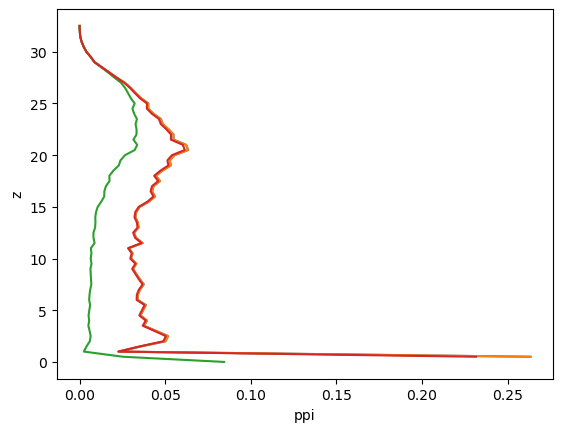

In [86]:
plot_metrics_default['vai_slice'].plot(y='z')
plot_metrics_default['vad'].plot(y='z')
# plot_metrics_default['vad_norm'].plot(y='z')
# (plot_metrics_default['vad'] * 2).plot(y='z')
(plot_metrics_default['inside_pct'] / 100).plot(y='z')
(1 - plot_metrics_default['ppi']).plot(y='z')